# Programming Assignment 1
* CSCI-4930/5930 ML Spring 2019  (Be sure to discard which section you are not enrolled)
* Author: Shreya Dubey 

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
import sklearn
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)


### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
df_train = pd.read_csv("baby-weights-dataset2.csv")




### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
print (df_train.shape)
df_train.head
df_train['BWEIGHT'].describe()




(101400, 37)


count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


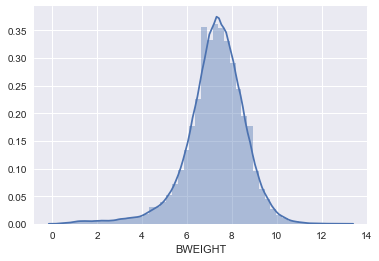

In [4]:
sns.distplot(df_train['BWEIGHT'])





### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

Skewness: -3.558541
Kurtosis: 24.020191


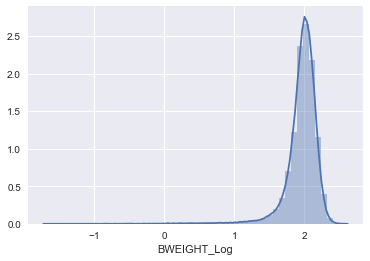

In [5]:
df_train['BWEIGHT_Log']= np.log(df_train['BWEIGHT'])

sns.distplot(df_train['BWEIGHT_Log'])

print("Skewness: %f" % df_train['BWEIGHT_Log'].skew())
print("Kurtosis: %f" % df_train['BWEIGHT_Log'].kurt())



### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

I am choosing 7 variables as my training variables as they have a correlation score above 0.09.
These variables are - WEEKS, GAINED, VISITS, HYPERPR, MARITAL, SEX and CIGNUM

BWEIGHT        1.000000
BWEIGHT_Log    0.948247
WEEKS          0.565376
GAINED         0.173262
VISITS         0.129587
HYPERPR        0.108541
MARITAL        0.107106
SEX            0.093440
CIGNUM         0.090670
RACEDAD        0.084056
RACEMOM        0.079893
PRETERM        0.072932
MAGE           0.068473
ECLAMP         0.068073
PINFANT        0.067073
CERVIX         0.066935
MEDUC          0.055908
FEDUC          0.052673
FAGE           0.051447
HYDRAM         0.050001
HYPERCH        0.043561
UTERINE        0.042741
LOUTCOME       0.037264
BDEAD          0.036611
TERMS          0.026878
ANEMIA         0.011487
HEMOGLOB       0.010994
DIABETES       0.010216
DRINKNUM       0.010207
RENAL          0.007734
ACLUNG         0.006643
TOTALP         0.003201
ID             0.003001
RHSEN          0.001985
HERPES         0.001442
CARDIAC        0.000425
Name: BWEIGHT, dtype: float64


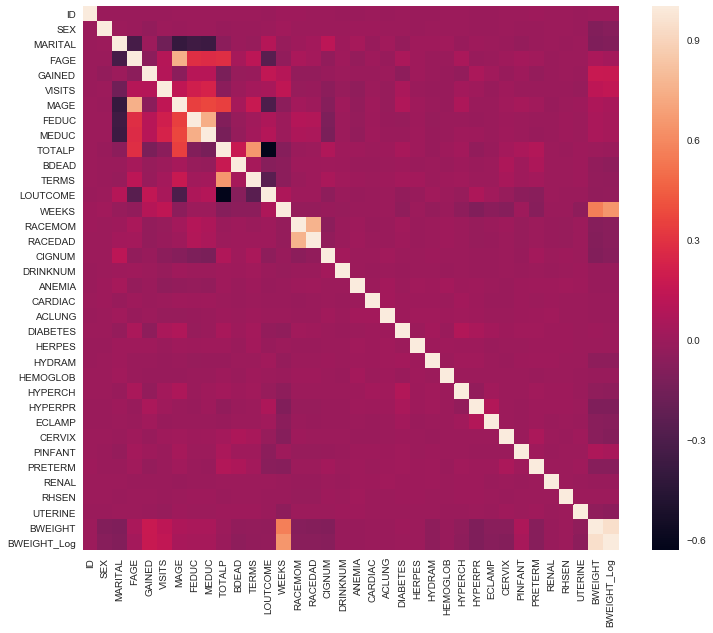

In [6]:
corr_matrix = df_train.corr()

#set the figure size for heatmap 
plt.figure(figsize = (12,10))

#plot heatmap 
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

#def print_cols_large_corr(df, nr_c, targ) :
corr_abs = corr_matrix.abs()
#corr_matrix['BWEIGHT'].sort_values(ascending=False)
from pandas.tools.plotting import scatter_matrix
print(corr_abs['BWEIGHT'].sort_values(ascending=False))
#attributes = ["BWEIGHT", "WEEKS", "GAINED", "VISITS", "HYPERPR"]
#scatter_matrix(df_train[attributes], figsize=(16,16))


### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [7]:
df_train.info()
df_train_num1 = df_train.drop("HISPMOM", axis=1)
df_train_num2 = df_train_num1.drop("HISPDAD", axis=1)

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
imputer.fit(df_train_num2)

df_train_num2.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 38 columns):
ID             101400 non-null int64
SEX            101400 non-null int64
MARITAL        101400 non-null int64
FAGE           101400 non-null int64
GAINED         101400 non-null int64
VISITS         101400 non-null int64
MAGE           101400 non-null int64
FEDUC          101400 non-null int64
MEDUC          101400 non-null int64
TOTALP         101400 non-null int64
BDEAD          101400 non-null int64
TERMS          101400 non-null int64
LOUTCOME       101400 non-null int64
WEEKS          101400 non-null int64
RACEMOM        101400 non-null int64
RACEDAD        101400 non-null int64
HISPMOM        101400 non-null object
HISPDAD        101400 non-null object
CIGNUM         101400 non-null int64
DRINKNUM       101400 non-null int64
ANEMIA         101400 non-null int64
CARDIAC        101400 non-null int64
ACLUNG         101400 non-null int64
DIABETES       101400 non-null int64

<bound method NDFrame.head of             ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  \
0         2001    2        1    33      26      10    34     12      4   
1         2002    2        2    19      40      10    18     11     12   
2         2003    2        1    33      16      14    31     16     16   
3         2004    1        1    25      40      15    28     12     12   
4         2005    1        2    21      60      13    20     12     14   
5         2006    1        1    21      30      15    21     12     13   
6         2007    1        2    29      20      11    32      6      6   
7         2008    2        2    23      41      15    21     13     13   
8         2009    2        1    27       0      12    26     10     13   
9         2010    1        1    30      30      10    22     12     14   
10        2011    2        2    29      15      22    29     13     14   
11        2012    1        2    23      30      13    23     12     13   
12      

### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_train_dum = df_train["HISPMOM"]
df_train_dum_encoded = encoder.fit_transform(df_train_dum)

df_train_dum1 = df_train["HISPDAD"]
df_train_dum1_encoded = encoder.fit_transform(df_train_dum1)

#MultiColumnLabelEncoder(columns = ['HISPMOM','HISPDAD']).fit_transform(df_train)

#print(encoder.classes_)
#print(df_train_dum_encoded)
#print(df_train_dum1_encoded)
#print(df_train_dum1_encoded.size)

df_train['HISPMOM'] = df_train_dum_encoded
df_train['HISPDAD'] = df_train_dum1_encoded
df_train.shape

(101400, 38)

### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [9]:
train_set, test_set = train_test_split(df_train, test_size=0.20, random_state =50)
print(train_set.shape)
print(test_set.shape)

corr_matrix = df_train.corr()
corr_abs = corr_matrix.abs()
print(corr_abs['BWEIGHT'].sort_values(ascending=False))

(81120, 38)
(20280, 38)
BWEIGHT        1.000000
BWEIGHT_Log    0.948247
WEEKS          0.565376
GAINED         0.173262
VISITS         0.129587
HYPERPR        0.108541
MARITAL        0.107106
SEX            0.093440
CIGNUM         0.090670
RACEDAD        0.084056
RACEMOM        0.079893
PRETERM        0.072932
MAGE           0.068473
ECLAMP         0.068073
PINFANT        0.067073
CERVIX         0.066935
MEDUC          0.055908
FEDUC          0.052673
FAGE           0.051447
HYDRAM         0.050001
HYPERCH        0.043561
UTERINE        0.042741
LOUTCOME       0.037264
BDEAD          0.036611
TERMS          0.026878
HISPMOM        0.015853
HISPDAD        0.014481
ANEMIA         0.011487
HEMOGLOB       0.010994
DIABETES       0.010216
DRINKNUM       0.010207
RENAL          0.007734
ACLUNG         0.006643
TOTALP         0.003201
ID             0.003001
RHSEN          0.001985
HERPES         0.001442
CARDIAC        0.000425
Name: BWEIGHT, dtype: float64


### TASK 9.2: On the training dataset, apply a normalization technique

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(train_set))
print(scaler.transform(train_set))
train_set.head

xtrain_set = train_set[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]
ytrain_set = train_set[["BWEIGHT"]]
print(xtrain_set.shape)
print(ytrain_set.shape)

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.73037209 0.         0.         ... 0.         0.58737864 0.87698235]
 [0.59957199 0.125      1.         ... 0.         0.50485437 0.84223627]
 [0.54590282 0.         1.         ... 0.         0.64563107 0.89874941]
 ...
 [0.47748992 0.125      0.         ... 0.         0.40776699 0.79347701]
 [0.22324678 0.125      0.         ... 0.         0.60194175 0.8826155 ]
 [0.13806842 0.125      0.         ... 0.         0.51456311 0.84660014]]
(81120, 11)
(81120, 1)


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [11]:
print(scaler.fit(test_set))
print(scaler.transform(test_set))
test_set.head

xtest_set = test_set[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]
ytest_set = test_set[["BWEIGHT"]]
print(xtest_set.shape)
print(ytest_set.shape)


MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.9161858  1.         1.         ... 0.         0.5920398  0.8575513 ]
 [0.79862693 1.         1.         ... 0.         0.44776119 0.78300496]
 [0.83007329 1.         0.         ... 0.         0.52736318 0.82653855]
 ...
 [0.68994565 1.         0.         ... 0.         0.43283582 0.77403883]
 [0.7515955  0.         0.         ... 0.         0.54726368 0.83644867]
 [0.21185847 1.         0.         ... 0.         0.15422886 0.51374734]]
(20280, 11)
(20280, 1)


### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [12]:
X = xtrain_set.iloc[:,:]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)


y = ytrain_set.iloc[:,:].values #.converts pandas Dataframe to numpy.ndarray

#select initial weights. Taking all zeros to start with
weight = np.zeros([1,X.shape[1]])

#set learning rate and number of iterations
alpha = 0.0005  
iters = 10000


# Print shapes of X, y and theta to make sure their dimensions are correct 
print(X.shape) ; 
print(y.shape) ;
print(weight.shape);



#computecost
def computeCost(X,y,weight):
    
    h = X@weight.T    # '@' for matrix multiplication. Alternatively matmult() can be used
    error = h-y    
    loss = np.power(error,2)
    J = np.sum(loss)/(2*len(X))
    return J



#gradient descent
def gradientDescent(X,y,weight,iters,alpha):
    
    cost = np.zeros(iters)
    
    for i in range(iters):
            
        y_hat = X@weight.T
        gradient = np.sum(X*(y_hat - y)  ,  axis = 0)          
        weight = weight - (alpha/len(X))*gradient         
        cost[i] = computeCost(X, y, weight) 
        
        # print cost after every 100 iterations to keep a track of when the cost function converges
        if i%100 == 0:
            print("Iteration %d | Cost: %f" % (i, cost[i]))
            
    return weight,cost


#running the gd and cost function
W,cost = gradientDescent(X,y,weight,iters,alpha)
print("Weigths for the linear model", W)

finalCost = computeCost(X,y,W)
print(finalCost)



(81120, 12)
(81120, 1)
(1, 12)
Iteration 0 | Cost: 14.159922
Iteration 100 | Cost: 0.635999
Iteration 200 | Cost: 0.620659
Iteration 300 | Cost: 0.616260
Iteration 400 | Cost: 0.613808
Iteration 500 | Cost: 0.612062
Iteration 600 | Cost: 0.610690
Iteration 700 | Cost: 0.609551
Iteration 800 | Cost: 0.608571
Iteration 900 | Cost: 0.607705
Iteration 1000 | Cost: 0.606926
Iteration 1100 | Cost: 0.606213
Iteration 1200 | Cost: 0.605551
Iteration 1300 | Cost: 0.604932
Iteration 1400 | Cost: 0.604346
Iteration 1500 | Cost: 0.603789
Iteration 1600 | Cost: 0.603255
Iteration 1700 | Cost: 0.602742
Iteration 1800 | Cost: 0.602246
Iteration 1900 | Cost: 0.601766
Iteration 2000 | Cost: 0.601301
Iteration 2100 | Cost: 0.600848
Iteration 2200 | Cost: 0.600408
Iteration 2300 | Cost: 0.599979
Iteration 2400 | Cost: 0.599560
Iteration 2500 | Cost: 0.599152
Iteration 2600 | Cost: 0.598753
Iteration 2700 | Cost: 0.598364
Iteration 2800 | Cost: 0.597984
Iteration 2900 | Cost: 0.597612
Iteration 3000 | Cos

### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [13]:
# get all rows and columns of pandas dataframe xtest_set into numpy array X_test
X_test = xtest_set.iloc[:,:]

# make the first column all ones
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

#get all rows and columns of ytest_set into numpy array y_test
y_test = ytest_set.iloc[:,:].values 

print("shape of X_test: ", X_test.shape)
print("shape of W: ", W.shape)
print("shape of y_test: ", y_test.shape)


#err = y_test - np.matmul(X_test,W.T)  

err = y_test - (X_test@W.T)  

sq_err = err*err ; 

mean_sqr_err = np.sum(sq_err, axis = 0 )/len(err)

RMSE = math.sqrt(mean_sqr_err)
print("Root Mean Squared Error = ", RMSE)

shape of X_test:  (20280, 12)
shape of W:  (1, 12)
shape of y_test:  (20280, 1)
Root Mean Squared Error =  1.089435890861352


### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [22]:
df_judge = pd.read_csv("judge-without-labels_2.csv")

from sklearn.preprocessing import MinMaxScaler


xjudge_set = df_judge[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]

scaler = MinMaxScaler()
scaler.fit(xjudge_set)
print(scaler.transform(xjudge_set))



[[0.65384615 0.82352941 0.26190476 ... 0.125      0.         0.33333333]
 [0.84615385 0.42352941 0.35714286 ... 0.375      0.         0.09090909]
 [0.76923077 0.21176471 0.23809524 ... 0.125      0.         0.3030303 ]
 ...
 [0.73076923 0.34117647 0.26190476 ... 0.125      0.         0.57575758]
 [0.57692308 0.23529412 0.30952381 ... 0.125      0.         0.36363636]
 [0.53846154 0.52941176 0.38095238 ... 0.125      0.         0.36363636]]


### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [45]:
# get all rows and columns of pandas dataframe xtest_set into numpy array X_test
X_Judge = xjudge_set.iloc[:,:]

# make the first column all ones
ones = np.ones([X_Judge.shape[0],1])
X_Judge = np.concatenate((ones,X_Judge),axis=1)

#get all rows and columns of ytest_set into numpy array y_test


print("shape of X_test: ", X_Judge.shape)
print("shape of W: ", W.shape)



#err = y_test - np.matmul(X_test,W.T)  
BWEIGHT_PREDICION =  (X_Judge@W.T)  

print(BWEIGHT_PREDICION.shape)


idx = np.arange(len(BWEIGHT_PREDICION)).reshape(2001,1)

idx.astype(np.int)

BWEIGHT_PREDICION = np.concatenate((idx, BWEIGHT_PREDICION), axis = 1)

print(BWEIGHT_PREDICION.shape)
np.savetxt("Prediction.csv", BWEIGHT_PREDICION, delimiter=",")



shape of X_test:  (2001, 12)
shape of W:  (1, 12)
(2001, 1)
(2001, 2)


# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).